EDA notebook

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [42]:
limit_rows   = 7000000
df           = pd.read_csv("../input/train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)
unique_ids   = pd.Series(df["ncodpers"].unique())
limit_people = 1.2e4
unique_id    = unique_ids.sample(n=limit_people)
df           = df[df.ncodpers.isin(unique_id)]
df.describe()

/home/jeremy/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jeremy/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:2644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)


,ncodpers,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,9.358600e+04,93206.000000,93206.0,92736.000000,93206.000000,7.685700e+04,93586.0,93586.0,93586.000000,93586.000000,...,93586.000000,93586.000000,93586.000000,93586.000000,93586.000000,93586.000000,93586.000000,93362.000000,93362.000000,93586.000000
mean,8.059519e+05,1.169281,1.0,26.567255,0.500751,1.330334e+05,0.0,0.0,0.704892,0.000427,...,0.007790,0.009424,0.002714,0.055051,0.050200,0.028519,0.004114,0.063591,0.068850,0.135629
std,4.268853e+05,4.069528,0.0,12.671138,0.500002,2.017079e+05,0.0,0.0,0.456094,0.020670,...,0.087915,0.096622,0.052026,0.228081,0.218358,0.166452,0.064008,0.244025,0.253201,0.342396
min,1.591300e+04,1.000000,1.0,1.000000,0.000000,1.091499e+04,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.133970e+05,1.000000,1.0,15.000000,0.000000,6.801711e+04,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.253290e+05,1.000000,1.0,28.000000,1.000000,1.020439e+05,0.0,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.176136e+06,1.000000,1.0,34.000000,1.000000,1.569977e+05,0.0,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.495367e+06,99.000000,1.0,52.000000,1.000000,1.127137e+07,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["fecha_dato"].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [8]:
df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["age"]   = pd.to_numeric(df["age"], errors="coerce")

In [9]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

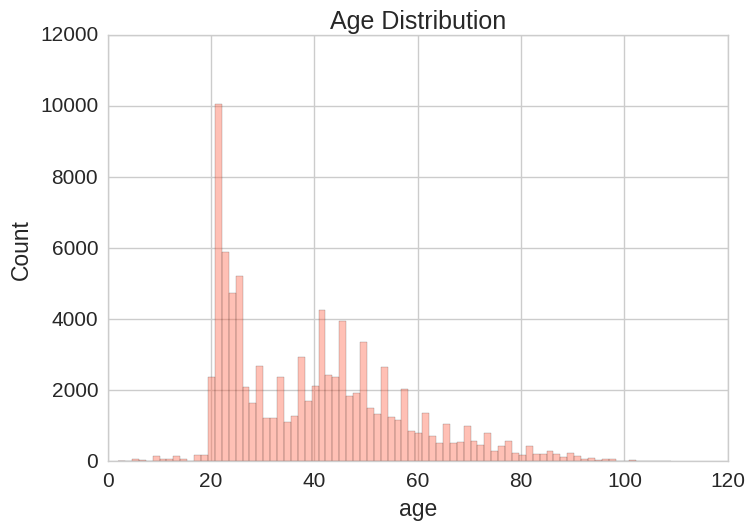

In [10]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In [11]:
# Customers count by channel 
df['canal_entrada'].value_counts().head(15)

KHE    30583
KAT    23326
KFC    21721
KFA     2728
KHK     1404
KHQ     1032
KHD      906
KAS      559
RED      511
KAA      477
KAG      445
KAB      432
KAY      421
KHM      400
KAE      368
Name: canal_entrada, dtype: int64

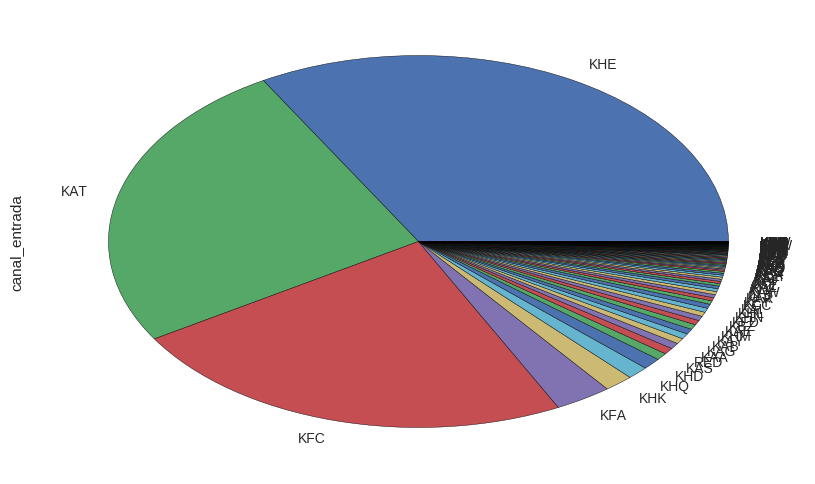

In [12]:
df["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie') 

In [15]:
df_a = df.loc[:, ['sexo', 'ind_actividad_cliente']].join(df.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_a = df_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
df_a = df_a.T

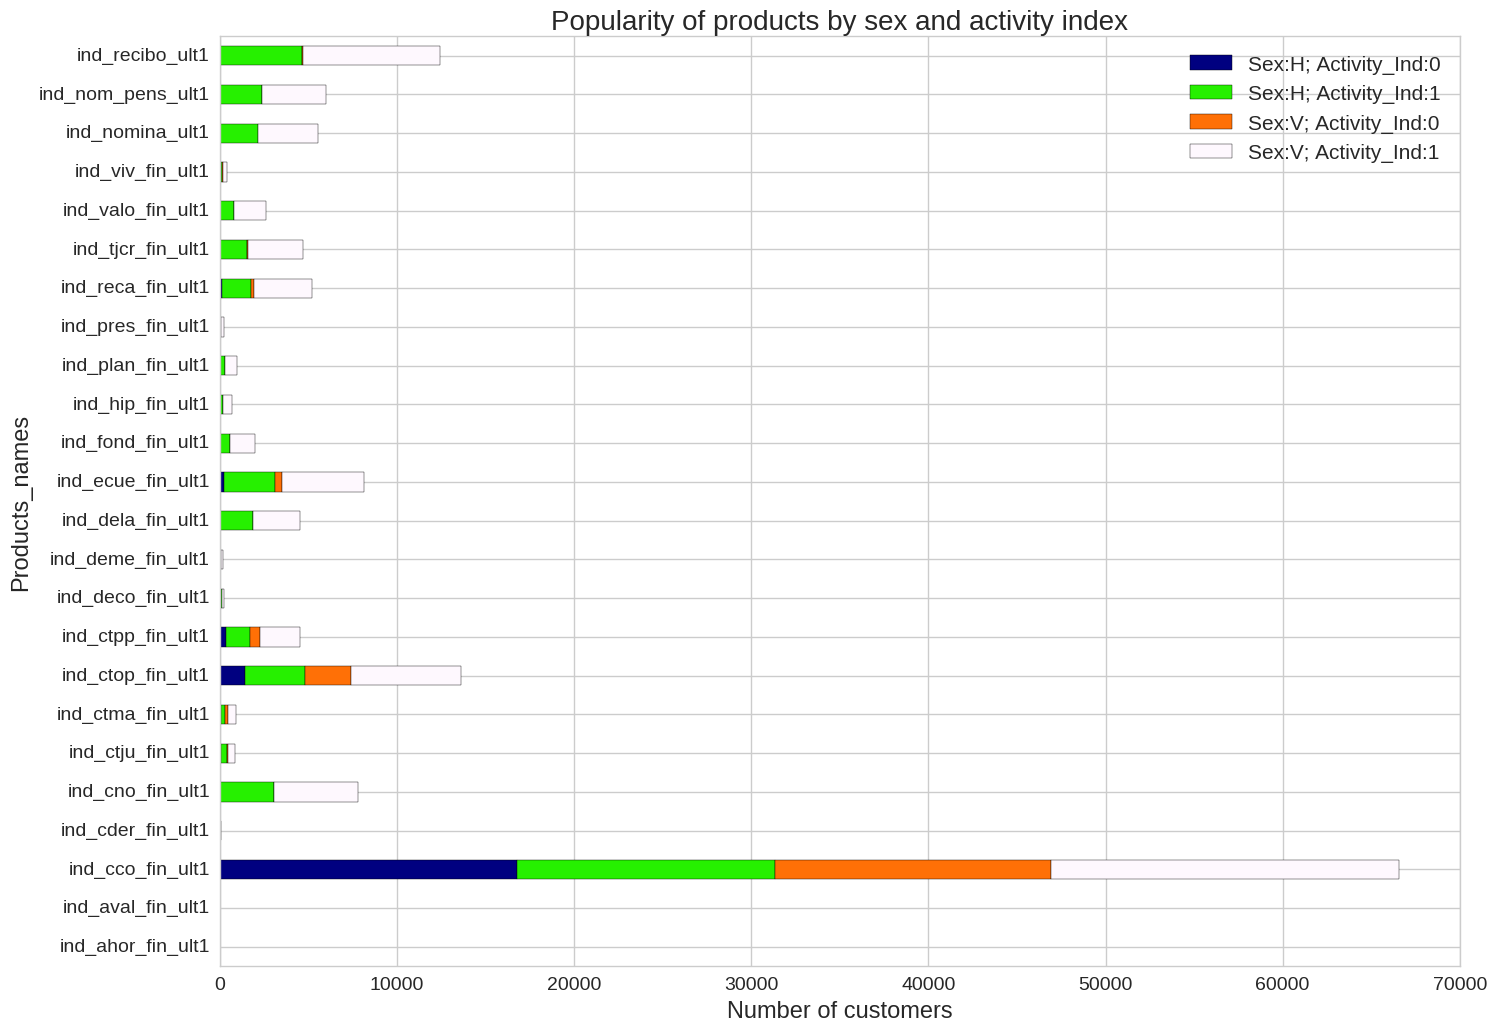

In [16]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

In [17]:
# excluding the dominant product 
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

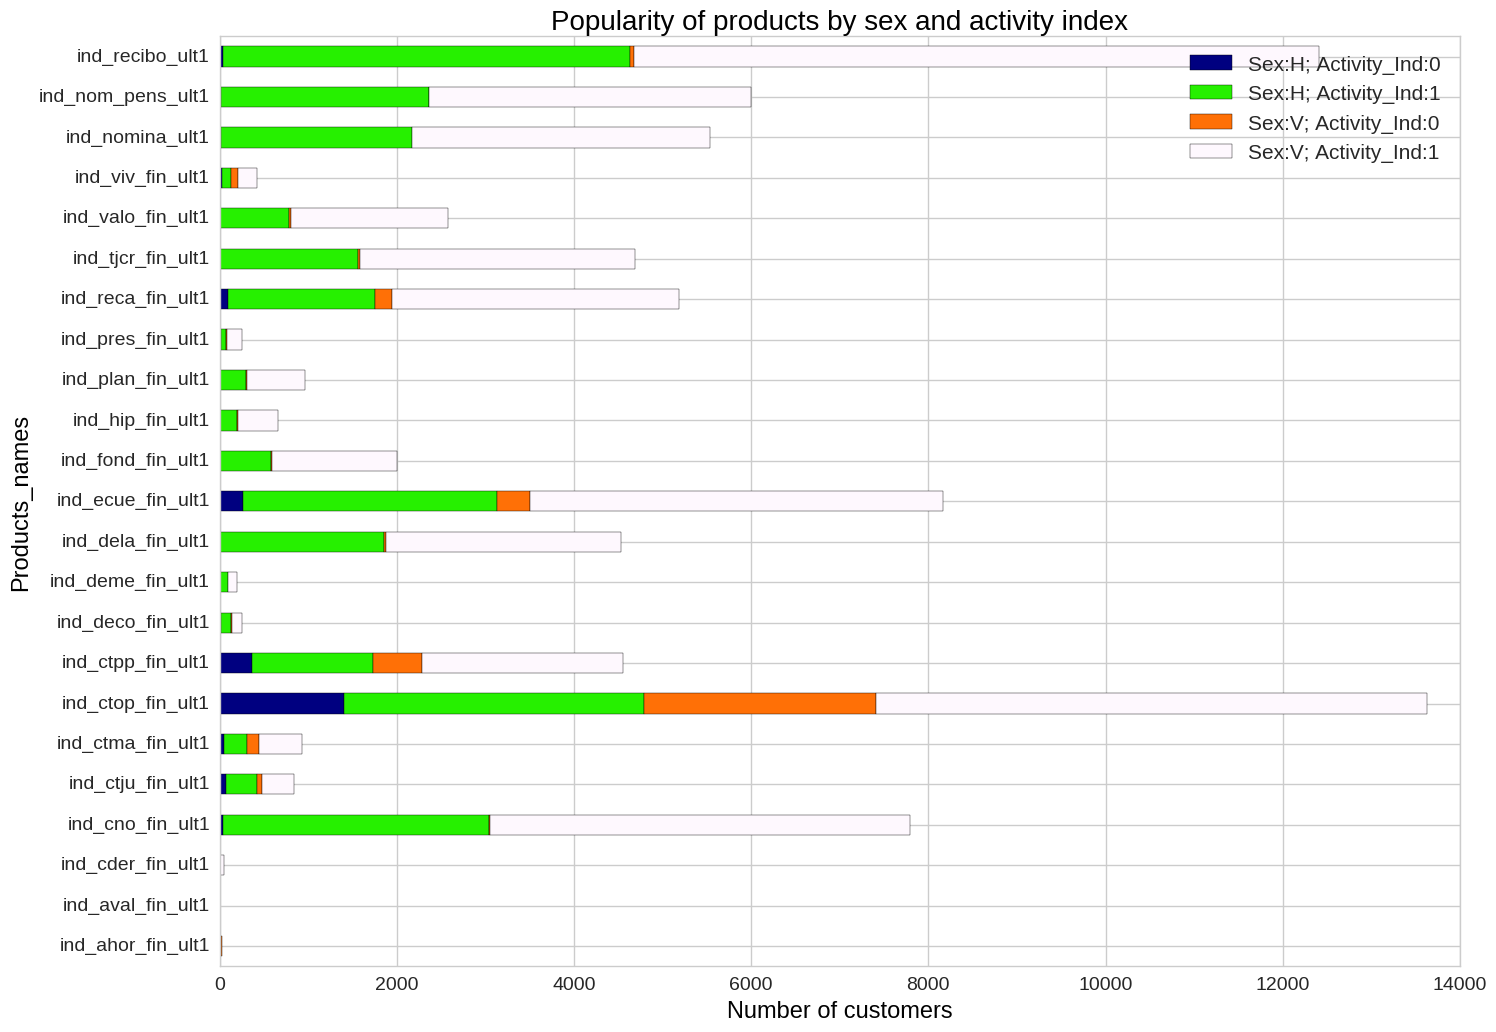

In [18]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20, color='black') 
plt.xlabel('Number of customers', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

In [27]:
# Let's create age groups
df_a = (df.groupby(pd.cut(df['age'], [0,20,40,60,80,100, pd.np.inf], right=False))
                     .sum())

In [28]:
# Keep the products columns and discard the others
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

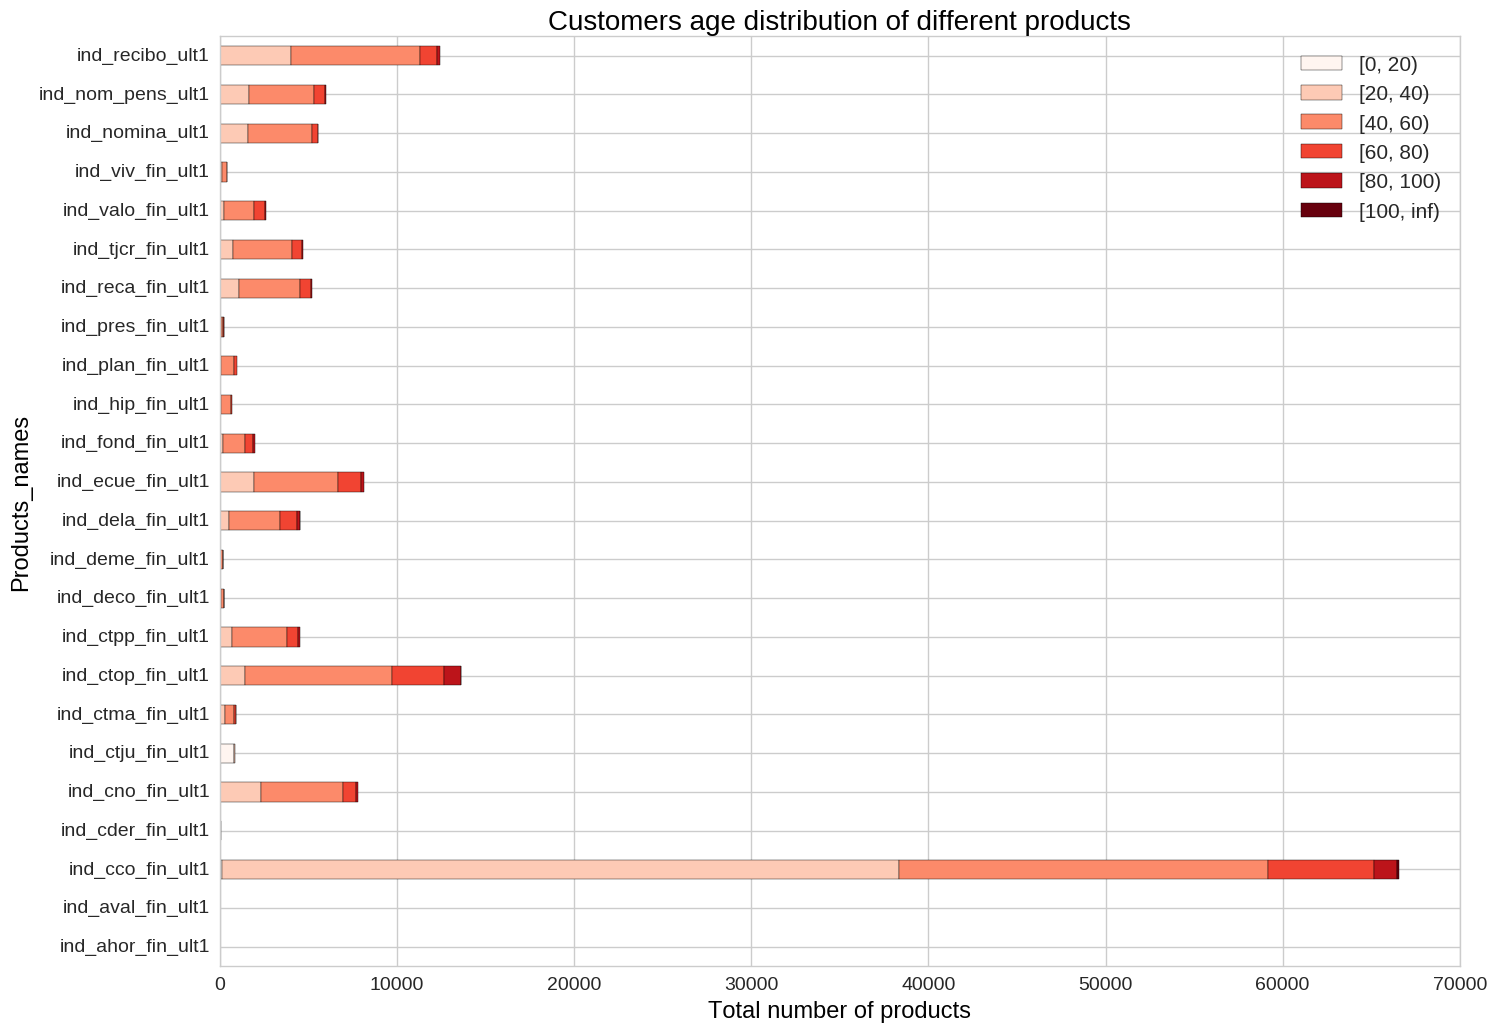

In [29]:
# Plot of customers' age distibution of each product 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Reds')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

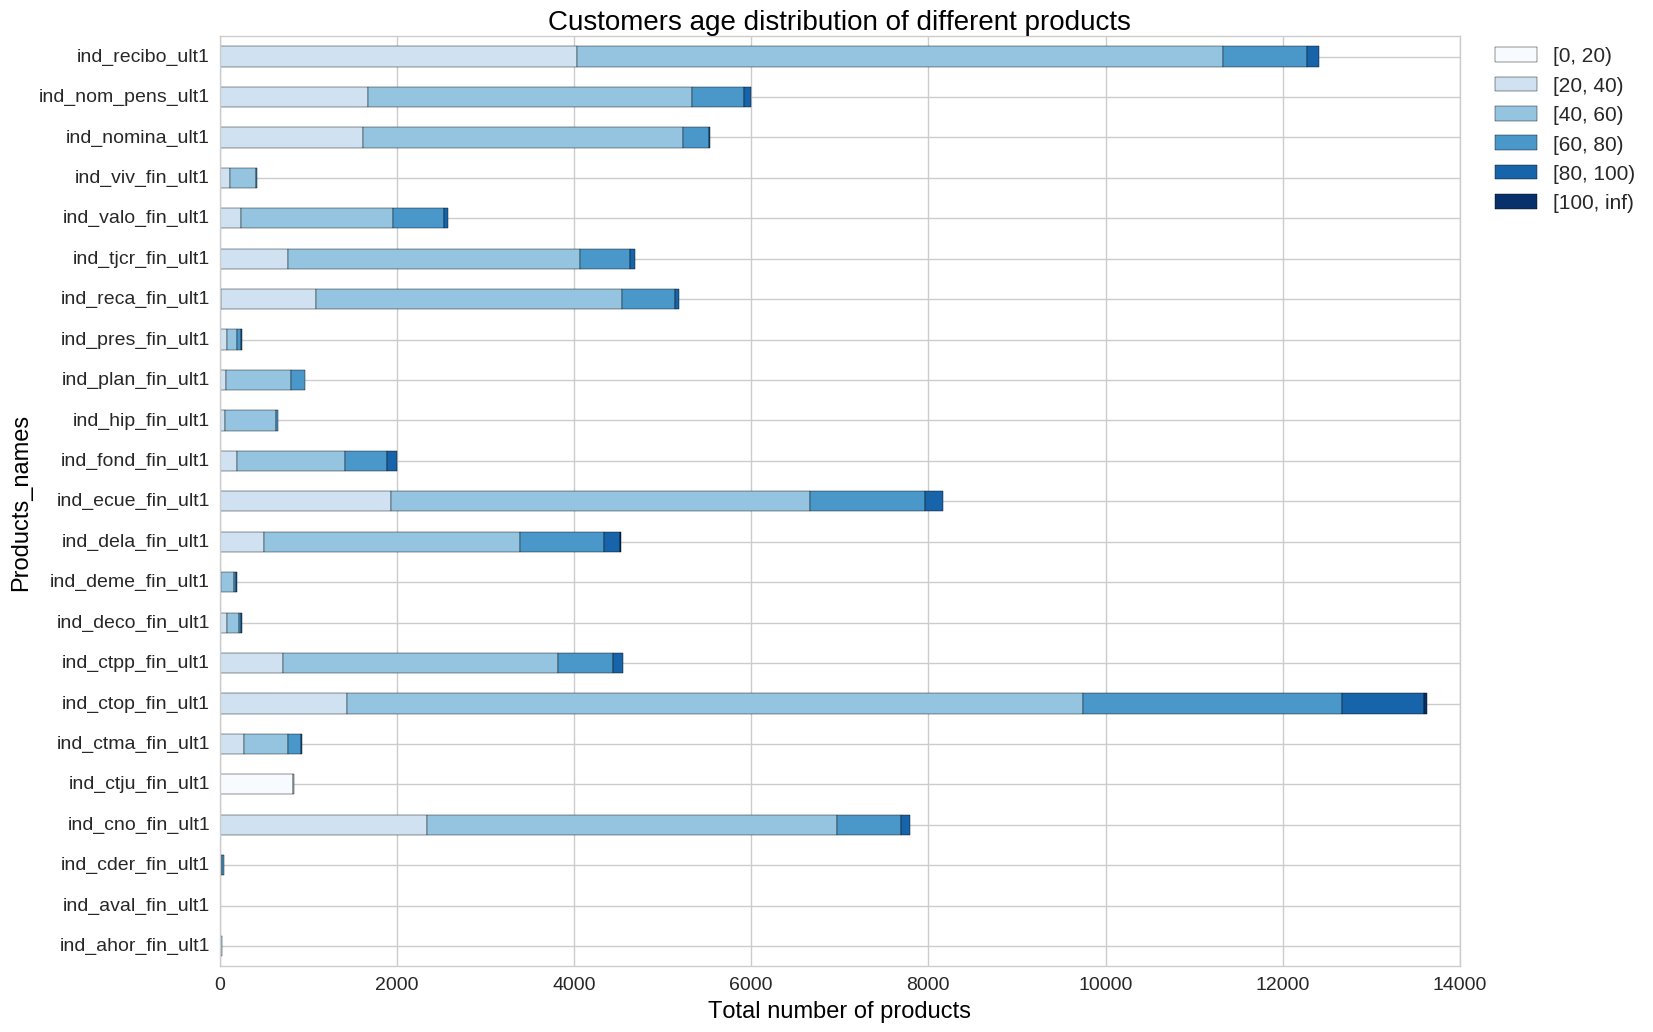

In [25]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

# Plot of customers' age distibution of each product (excluding the dominant product) 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Blues')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

In [35]:
df_a = df.loc[:,["age"]].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])


        


In [36]:
fnc = {c:'sum' for c in df_a.columns.drop(['age']).tolist()}
     ...: fnc['age'] = 'mean'
     ...: 

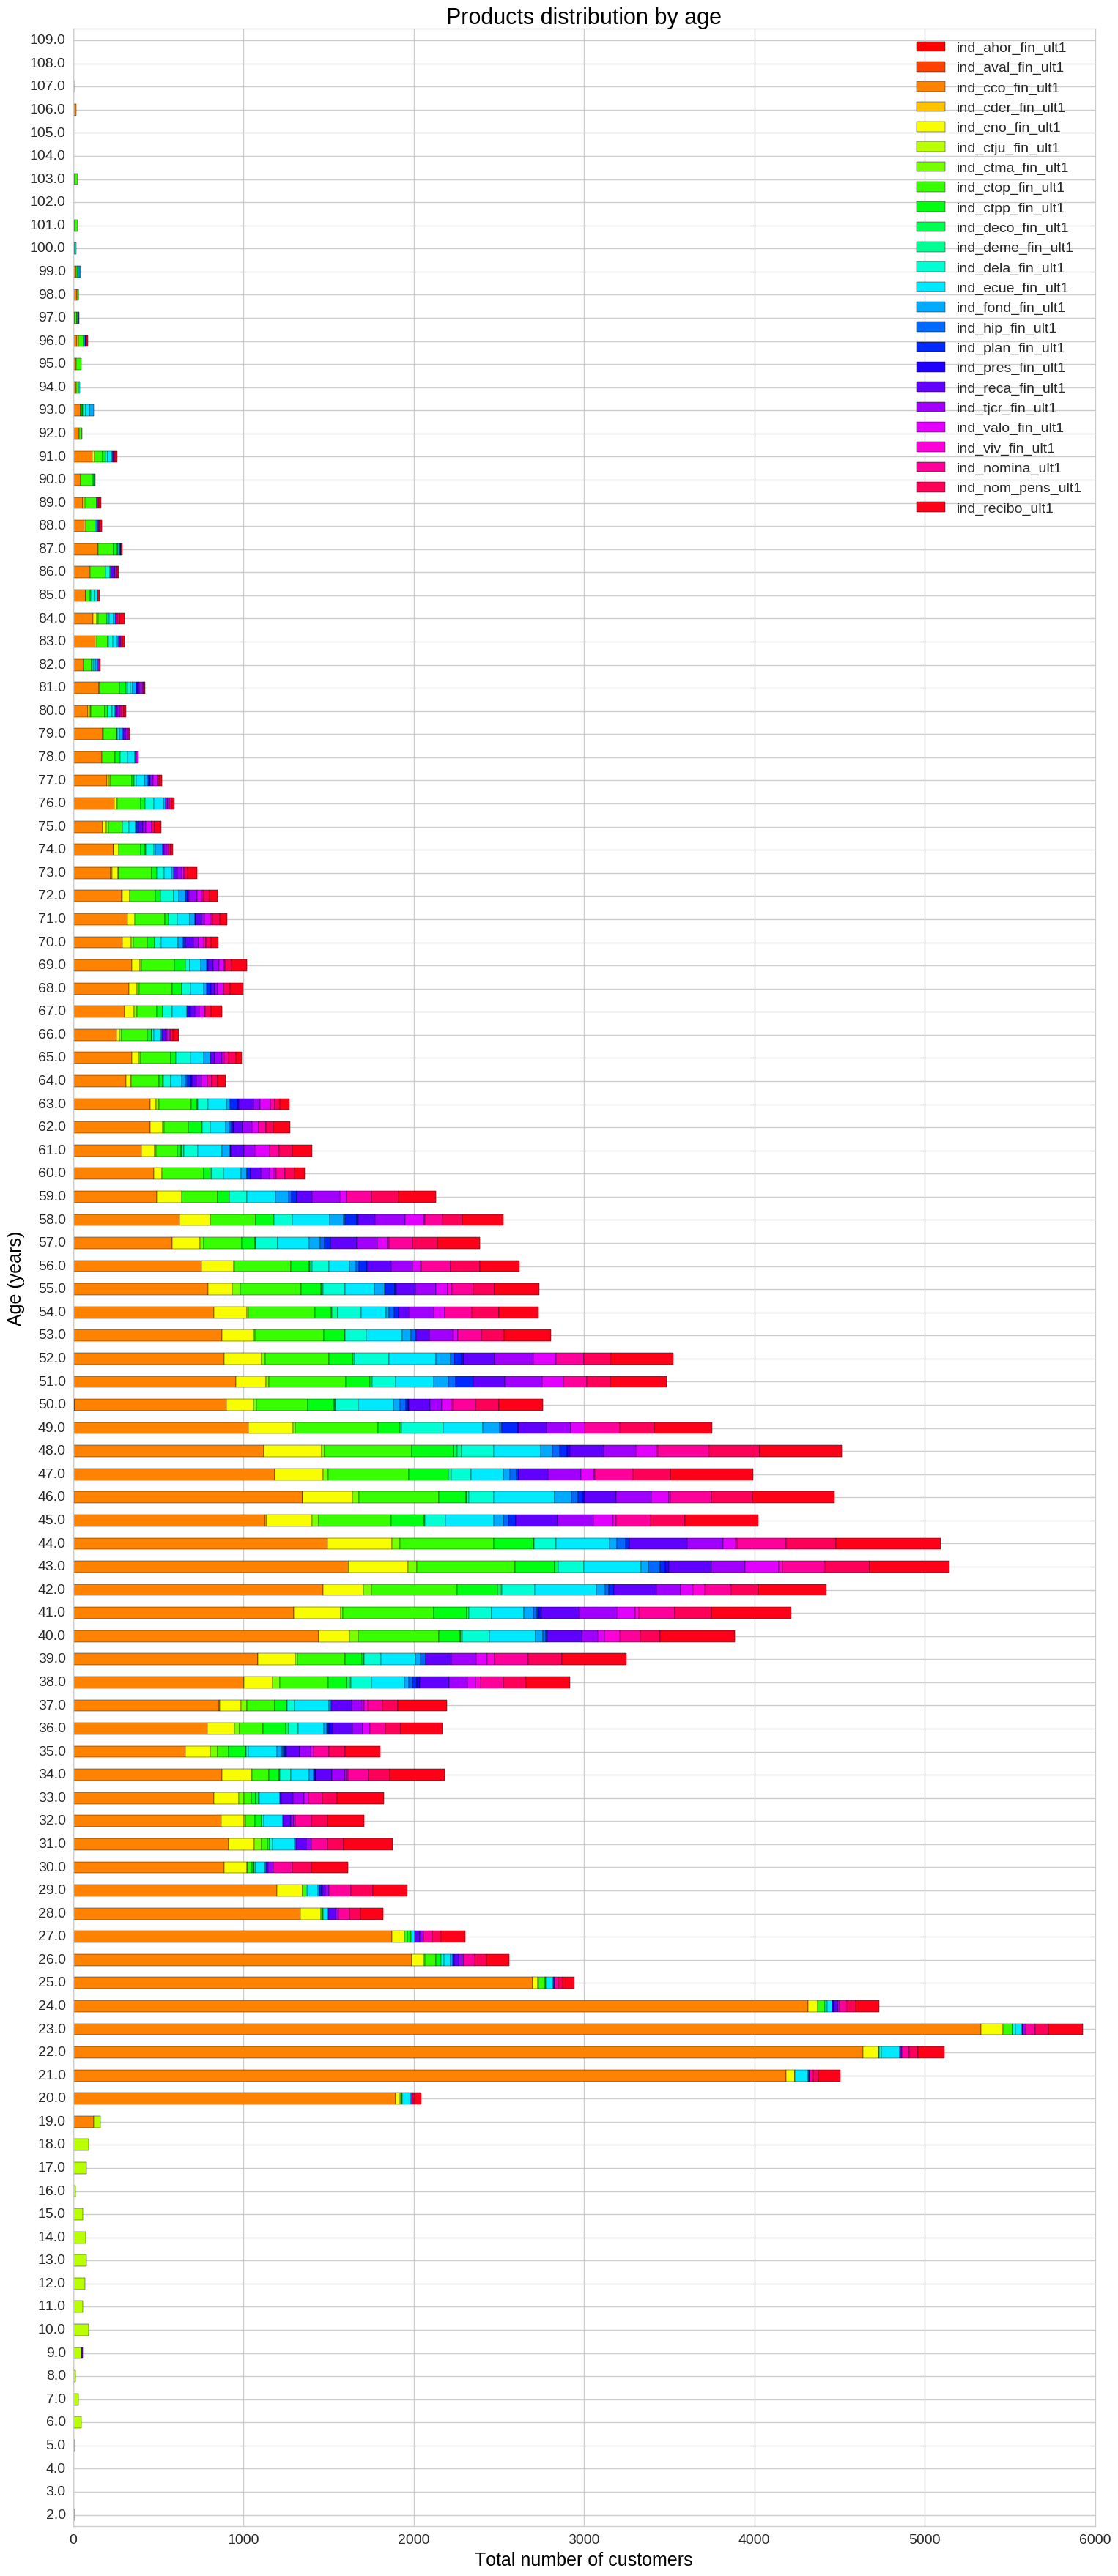

In [37]:
df_a = df_a.groupby('age').agg(fnc).reindex_axis(df_a.columns.drop('age'), 1) 

# Products distribution by age
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[18,44], colormap='hsv')
plt.title('Products distribution by age', fontsize=22, color='black') 
plt.xlabel('Total number of customers', fontsize=18, color='black') 
plt.ylabel('Age (years)', fontsize=18, color='black') 
plt.legend(prop={'size':14}) 

ncodpers                -0.079056
cod_prov                -0.009606
indrel                  -0.000478
ind_actividad_cliente    0.015667
age                      0.070383
renta                    1.000000
tipodom                       NaN
Name: renta, dtype: float64

In [48]:
f = open('../input/train_ver2.csv','r')
g = open('last_month.csv','w')

for line in f:
    date = line[:10]
    if date == '2016-05-28':
        g.write(line)
        
with open('../input/train_ver2.csv', 'r') as f:
    cols = f.readline().split(',')

cols = [s.replace('"', '') for s in cols]

In [49]:
df2 = pd.read_csv('last_month.csv',dtype={'indrel_1mes': str, 'conyuemp':str},names=cols)

In [50]:
df_features = df2.iloc[:,:24]

In [51]:
df_features.head()



,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-05-28,657640,N,ES,H,68,2006-11-17,0,114,1,...,N,NaN,KAQ,N,1,28.0,MADRID,0,147347.97,02 - PARTICULARES
1,2016-05-28,657788,N,ES,H,42,2006-11-18,0,114,1,...,N,NaN,KBF,N,1,28.0,MADRID,1,132559.35,02 - PARTICULARES
2,2016-05-28,657795,N,ES,V,44,2006-11-18,0,114,1,...,N,NaN,KAP,N,1,26.0,"RIOJA, LA",1,81399.57,02 - PARTICULARES
3,2016-05-28,657790,N,ES,V,42,2006-11-18,0,114,1,...,N,NaN,KBF,N,1,48.0,BIZKAIA,1,NaN,02 - PARTICULARES
4,2016-05-28,657794,N,ES,H,49,2006-11-18,0,114,1,...,N,NaN,KAT,N,1,8.0,BARCELONA,1,102189.00,01 - TOP


In [53]:
from sklearn import preprocessing

for f in df_features.columns:
    if df_features[f].dtype == 'object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df_features[f].values))
        df_features[f] = lbl.transform(list(df_features[f].values))

fecha_dato
ind_empleado
pais_residencia
sexo
fecha_alta
ult_fec_cli_1t
indrel_1mes
tiprel_1mes
indresi
indext
conyuemp
canal_entrada
indfall
nomprov
segmento


In [55]:
df_features.corr()['renta'].sort_values()

ncodpers                -0.080356
fecha_alta              -0.079895
canal_entrada           -0.059381
segmento                -0.057267
tiprel_1mes             -0.028969
cod_prov                -0.016736
nomprov                 -0.010990
indext                  -0.006829
conyuemp                -0.006340
ind_empleado            -0.004824
indresi                 -0.002060
ind_nuevo               -0.001204
ult_fec_cli_1t          -0.000159
indrel                   0.000206
pais_residencia          0.002149
antiguedad               0.002702
sexo                     0.006908
indfall                  0.008091
indrel_1mes              0.011299
ind_actividad_cliente    0.023142
age                      0.064450
renta                    1.000000
fecha_dato                    NaN
tipodom                       NaN
Name: renta, dtype: float64

segmento' and 'ind_actividad_cliente' seem reasonable and relevant fetaures to group by to get the median for 'renta':
In [15]:
df_features['segmento'].value_counts()
Out[15]:
1    542595
2    346395
0     35415
3      7024
Name: segmento, dtype: int64
In [16]:
df_features['ind_actividad_cliente'].value_counts()